# Homework 2 - 602 Principles of Data Science
### [Optional Part]

### Prepared by: Ricardo Zambrano

In [625]:
import pandas as pd
import numpy as np
import random
import requests
import urllib.request
import os
from tqdm import tqdm # To display progress bars in for loops
from bs4 import BeautifulSoup
from datetime import datetime, date, time
from datetime import timedelta
#import wget
import ftplib
import re
import matplotlib.dates as mdates
from calendar import monthrange
from sparklines import sparklines
import seaborn as sns
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
%matplotlib inline

## Part 3: Geomagnetic Storms (Optional)

As an optional exercise and to practice, also do the same exercise to replicate the Top 50 Geomagnetic Storms Webpage (https://www.spaceweatherlive.com/en/auroral-activity/top-50-geomagnetic-storms), along with a function to create a plot similar to: https://www.spaceweatherlive.com/en/archive/2003/10/29/kp.

The raw data for this is available at Kp Index Archive at Helmhotz Centre: http://www.gfz-potsdam.de/en/section/earths-magnetic-field/data-products-services/kp-index/archive/, specifically at: ftp://ftp.gfz-potsdam.de/pub/home/obs/kp-ap/tab/. I have copied down the entire directory (using wget --wait=20 --random-wait -r ftp://ftp.gfz-potsdam.de/pub/home/obs/kp-ap/tab/) so we don't all hit the server repeatadly (a real risk of getting the entire UMD domain blacklisted if one is not careful). You can find a zipped file: gfz-data.zip.

One of the things you will need to figure out is the format of the files in here (the .tab files), and how to parse them. There is however one-to-one mapping between rows in those files and the rows in the top-50 list at the link above (i.e., you don't have to do any aggregations or other types of processing to come up with the numbers shown in that top-50 table).

## Step 1: Request sapceweatherlive.com Top 50 Geomagnetic Storms

In [51]:
spaceWeatherURL = 'https://web.archive.org/web/20211205183148/https://www.spaceweatherlive.com/en/auroral-activity/top-50-geomagnetic-storms.html'
r = requests.get(spaceWeatherURL)

In [52]:
r.status_code

200

In [53]:
soup = BeautifulSoup(r.text, features='html.parser')

In [54]:
print(soup.prettify())

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <script src="//archive.org/includes/analytics.js?v=cf34f82" type="text/javascript">
  </script>
  <script type="text/javascript">
   window.addEventListener('DOMContentLoaded',function(){var v=archive_analytics.values;v.service='wb';v.server_name='wwwb-app220.us.archive.org';v.server_ms=419;archive_analytics.send_pageview({});});
  </script>
  <script charset="utf-8" src="/_static/js/bundle-playback.js?v=U25-Dms9" type="text/javascript">
  </script>
  <script charset="utf-8" src="/_static/js/wombat.js?v=UHAOicsW" type="text/javascript">
  </script>
  <script type="text/javascript">
   __wm.init("https://web.archive.org/web");
  __wm.wombat("https://www.spaceweatherlive.com/en/auroral-activity/top-50-geomagnetic-storms.html","20211205183148","https://web.archive.org/","web","/_static/",
	      "1638729108");
  </script>
  <link href="/_static/css/banner-styles.css?v=fantwOh2" rel="stylesheet" type="text/css"/>
  <link href="/_static/css

In [57]:
spaceGeoTable = soup.find("table", {"class":"table"})
spaceGeoTable

<table class="table"><thead><tr><th></th><th></th><th>Ap <a href="/web/20211205183148/https://www.spaceweatherlive.com/en/help/the-ap-index.html"><i aria-hidden="true" class="fas fa-info-circle"></i></a></th><th>00-03h</th><th>03-06h</th><th>06-09h</th><th>09-12h</th><th>12-15h</th><th>15-18h</th><th>18-21h</th><th>21-00h</th><th>Kp max</th><th></th></tr></thead><tbody><tr><td>1</td><td>2003/10/29</td><td><b>204</b></td><td class="table-danger text-center"><span class="Kp G1">5-</span></td><td class="table-warning text-center"><span class="Kp active">4</span></td><td class="table-danger text-center"><span class="Kp G4">9</span></td><td class="table-danger text-center"><span class="Kp G4">8</span></td><td class="table-danger text-center"><span class="Kp G4">8-</span></td><td class="table-danger text-center"><span class="Kp G4">8-</span></td><td class="table-danger text-center"><span class="Kp G4">9-</span></td><td class="table-danger text-center"><span class="Kp G4">9-</span></td><td><s

In [58]:
geoMagData = pd.read_html(str(spaceGeoTable), flavor='bs4')
geoMagData

[    Unnamed: 0  Unnamed: 1   Ap 00-03h 03-06h 06-09h 09-12h 12-15h 15-18h  \
 0            1  2003/10/29  204     5-      4      9      8     8-     8-   
 1            2  2003/10/30  191     9-     7+     5+     5-      5      7   
 2            3  2000/07/15  164      3     4-     5-     4+      8     9-   
 3            4  2001/03/31  192     7-     9-     9-     6+      7      8   
 4            5  2004/07/27  186     8+     8-     7+      8     9-     8+   
 5            6  2004/11/10  161     8-     8+     9-     8+     7+     6+   
 6            7  2003/11/20  150      1     4-     6+     6+     8-     9-   
 7            8  2001/11/06  142     9-     9-      7      5     5+     7-   
 8            9  2004/11/08  140     9-     9-     8+      7      5     3-   
 9           10  2004/11/09  119     6-      6      5      6      7     7-   
 10          11  2005/08/24  102     3-     3+     6+     9-     7+     7-   
 11          12  1998/05/04  101      6     9-     8+     6-    

In [59]:
SWgeoMagDF = geoMagData[0]
SWgeoMagDF

,Unnamed: 0,Unnamed: 1,Ap,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Kp max,Unnamed: 12
0,1,2003/10/29,204,5-,4,9,8,8-,8-,9-,9-,9,View archive
1,2,2003/10/30,191,9-,7+,5+,5-,5,7,9,9,9,View archive
2,3,2000/07/15,164,3,4-,5-,4+,8,9-,9,9-,9,View archive
3,4,2001/03/31,192,7-,9-,9-,6+,7,8,8+,7+,9-,View archive
4,5,2004/07/27,186,8+,8-,7+,8,9-,8+,6+,6,9-,View archive
5,6,2004/11/10,161,8-,8+,9-,8+,7+,6+,5+,4+,9-,View archive
6,7,2003/11/20,150,1,4-,6+,6+,8-,9-,9-,8,9-,View archive
7,8,2001/11/06,142,9-,9-,7,5,5+,7-,6+,6+,9-,View archive
8,9,2004/11/08,140,9-,9-,8+,7,5,3-,4+,5+,9-,View archive
9,10,2004/11/09,119,6-,6,5,6,7,7-,9-,7,9-,View archive


**Ric wrote:** Now I will tidy the Sapace Weather dataframe

In [61]:
len(SWgeoMagDF.columns)

13

In [62]:
SWgeoMagDF.head(5)

,Unnamed: 0,Unnamed: 1,Ap,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Kp max,Unnamed: 12
0,1,2003/10/29,204,5-,4,9,8,8-,8-,9-,9-,9,View archive
1,2,2003/10/30,191,9-,7+,5+,5-,5,7,9,9,9,View archive
2,3,2000/07/15,164,3,4-,5-,4+,8,9-,9,9-,9,View archive
3,4,2001/03/31,192,7-,9-,9-,6+,7,8,8+,7+,9-,View archive
4,5,2004/07/27,186,8+,8-,7+,8,9-,8+,6+,6,9-,View archive


In [63]:
SWgeoMagDF.columns = ['Rank','Date','Ap','00-03h','03-06h','06-09h','09-12h','12-15h','15-18h',
                     '18-21h','21-00h','Kp_max','ArchiveLink']

In [64]:
SWgeoMagDF.head(5)

,Rank,Date,Ap,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Kp_max,ArchiveLink
0,1,2003/10/29,204,5-,4,9,8,8-,8-,9-,9-,9,View archive
1,2,2003/10/30,191,9-,7+,5+,5-,5,7,9,9,9,View archive
2,3,2000/07/15,164,3,4-,5-,4+,8,9-,9,9-,9,View archive
3,4,2001/03/31,192,7-,9-,9-,6+,7,8,8+,7+,9-,View archive
4,5,2004/07/27,186,8+,8-,7+,8,9-,8+,6+,6,9-,View archive


In [65]:
SWgeoMagDF = SWgeoMagDF.drop('ArchiveLink', axis=1)
SWgeoMagDF

,Rank,Date,Ap,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Kp_max
0,1,2003/10/29,204,5-,4,9,8,8-,8-,9-,9-,9
1,2,2003/10/30,191,9-,7+,5+,5-,5,7,9,9,9
2,3,2000/07/15,164,3,4-,5-,4+,8,9-,9,9-,9
3,4,2001/03/31,192,7-,9-,9-,6+,7,8,8+,7+,9-
4,5,2004/07/27,186,8+,8-,7+,8,9-,8+,6+,6,9-
5,6,2004/11/10,161,8-,8+,9-,8+,7+,6+,5+,4+,9-
6,7,2003/11/20,150,1,4-,6+,6+,8-,9-,9-,8,9-
7,8,2001/11/06,142,9-,9-,7,5,5+,7-,6+,6+,9-
8,9,2004/11/08,140,9-,9-,8+,7,5,3-,4+,5+,9-
9,10,2004/11/09,119,6-,6,5,6,7,7-,9-,7,9-


In [70]:
for indx in range(len(SWgeoMagDF)):
    SWgeoMagDF.iloc[indx,1] = datetime.strptime(SWgeoMagDF.iloc[indx,1],"%Y/%m/%d")

In [71]:
SWgeoMagDF.head(5)

,Rank,Date,Ap,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Kp_max
0,1,2003-10-29 00:00:00,204,5-,4,9,8,8-,8-,9-,9-,9
1,2,2003-10-30 00:00:00,191,9-,7+,5+,5-,5,7,9,9,9
2,3,2000-07-15 00:00:00,164,3,4-,5-,4+,8,9-,9,9-,9
3,4,2001-03-31 00:00:00,192,7-,9-,9-,6+,7,8,8+,7+,9-
4,5,2004-07-27 00:00:00,186,8+,8-,7+,8,9-,8+,6+,6,9-


## Step 2: Request raw data from www.gfz-postdam.de

https://www.gfz-potsdam.de/en/section/geomagnetism/data-products-services/geomagnetic-kp-index

https://kp.gfz-potsdam.de/en/data

In [232]:
path = 'C:/Users/rzamb/Desktop/Desktop/UMD/Principles of Data Science/HW/ftp/'

In [240]:
hostname = 'ftp.gfz-potsdam.de'

In [241]:
ftp_server = ftplib.FTP(hostname)

In [242]:
ftp_server.login()

'230-\n230-Please avoid any denial of service.\n230-Do not use too many parallel sessions and PLEASE, do not fill up the filesystems.\n230-To assist you with this task you see the actual disk usage below. It is updated every minute.\n230-\n230-For any problems please write to ftpadmin@gfz-potsdam.de. We will surely find solutions for special needs.\n230-\n230-Filesystems free space in megabytes and differences since 6:00 MET and for this hour\n230-File-System                        Space-NOW      since 6:00  This-Hour\n230-/pub                                  19214          0          0\n230-/pub/ICDP                             27221          0          0\n230-/pub/ODYSSEUSWP6                    2096961          0          0\n230-/pub/champ                           174730        -16          0\n230-/pub/champ/chftp4                    115986      11700          0\n230-/pub/gemex                            37931          0          0\n230-/pub/grace                            39870  

In [243]:
ftp_server.dir()

total 208
lrwxrwxrwx   1 root     other         13 May 30  2011 ADS -> ./home/kg/ADS
drwxr-xr-x   2 root     other       4096 Nov  6  2002 DEKORP
lrwxrwxrwx   1 root     root           9 Jan 15  2015 GNSS -> home/GNSS
drwxrwx--x  39 root     11600       4096 Feb  1  2022 ICDP
drwxr-x--x   3 16210    root        4096 Aug 11  2021 ODYSSEUSWP6
lrwxrwxrwx   1 root     bin            9 May 30  2011 bin -> ./usr/bin
drwxr-xr-x  12 root     other       4096 Oct  2  2008 champ
d--x--x--x   2 root     sys         4096 Apr 27  2010 dev
d--x--x--x   6 root     sys         4096 Feb 21  2018 etc
drwxrwx--x   6 16446    14546       4096 Sep 20  2019 gemex
drwxr-xr-x   6 root     root        4096 Sep 10  2014 grace
drwxr-xr-x  37 root     root        4096 Dec  6  2021 home
lrwxrwxrwx   1 root     root           8 May 30  2011 i -> incoming
lrwxrwxrwx   1 root     other         25 May 30  2011 igsprod -> ./transfer/kg_igs/igsprod
lrwxrwxrwx   1 root     other         25 May 30  2011 igstrop -> ./trans

In [244]:
ftp_server.cwd('pub/home/obs/kp-ap/tab') 

'250 CWD command successful.'

In [245]:
ftp_server.dir()

total 50952
-rw-r--r--   1 11423    11400      36994 Jun 21  2001 kp0001.ps
-rw-r--r--   1 11423    11400       1676 Jun 21  2001 kp0001.tab
-rw-r--r--   1 11423    11400      37274 Jun 21  2001 kp0002.ps
-rw-r--r--   1 11423    11400       1576 Jun 21  2001 kp0002.tab
-rw-r--r--   1 11423    11400      36864 Jun 21  2001 kp0003.ps
-rw-r--r--   1 11423    11400       1676 Jun 21  2001 kp0003.tab
-rw-r--r--   1 11423    11400      36723 Jun 21  2001 kp0004.ps
-rw-r--r--   1 11423    11400       1626 Jun 21  2001 kp0004.tab
-rw-r--r--   1 11423    11400      36740 Jun 21  2001 kp0005.ps
-rw-r--r--   1 11423    11400       1676 Jun 21  2001 kp0005.tab
-rw-r--r--   1 11423    11400      36969 Jun 21  2001 kp0006.ps
-rw-r--r--   1 11423    11400       1626 Jun 21  2001 kp0006.tab
-rw-r--r--   1 11423    11400      37206 Jun 21  2001 kp0007.ps
-rw-r--r--   1 11423    11400       1676 Jun 21  2001 kp0007.tab
-rw-r--r--   1 11423    11400      36552 Jun 21  2001 kp0008.ps
-rw-r--r--   1 11423 

**Ric wrote:** I will save the list of files in the ftp server

In [246]:
fileList = ftp_server.nlst()

In [247]:
len(fileList)

674

**Ric wrote:** First I read the text file to read the metadata of this data source

In [248]:
filename1 = "tab_fmt.txt"

In [249]:
with open(filename1, "wb") as file:
    # Command for Downloading the file "RETR filename"
    ftp_server.retrbinary(f"RETR {filename1}", file.write)

In [250]:
# Display the content of downloaded file
file = open(filename1, "r")
print('File Content:', file.read())

File Content: Format Documentation of kpyymm.tab Files
----------------------------------------------------------------------------




DOI and licence of the Kp dataset

Data in the kpyymm.tab files is based on the Kp dataset.
DOI of the Kp dataset: https://doi.org/10.5880/Kp.0001
Kp dataset described in:
Matzka, J., Stolle, C., Yamazaki, Y., Bronkalla, O. and Morschhauser, A.,
2021. The geomagnetic Kp index and derived indices of geomagnetic activity.
Space Weather, https://doi.org/10.1029/2020SW002641
Kp dataset publication:
Matzka, J., Bronkalla, O., Tornow, K., Elger, K. and Stolle, C., 2021.
Geomagnetic Kp index. V. 1.0. GFZ Data Services, https://doi.org/10.5880/Kp.0001

Licence of the dataset and plots: CC BY 4.0





Availability

The most recent kpyymm.tab (yymm stands for year and month, each expressed
with two digits) files are distributed per e-mail half-monthly by

     Juergen Matzka, mailto:kp_index@gfz-potsdam.de

Both recent and past tables (since 1994) are supplied a

**Ric wrote:** Now I will select the subset of files that end in .tab using a regular expression

In [251]:
re1 = re.compile('tab$')

In [252]:
tabFiles = list(filter(re1.search,fileList))

In [253]:
tabFiles

['kp0001.tab',
 'kp0002.tab',
 'kp0003.tab',
 'kp0004.tab',
 'kp0005.tab',
 'kp0006.tab',
 'kp0007.tab',
 'kp0008.tab',
 'kp0009.tab',
 'kp0010.tab',
 'kp0011.tab',
 'kp0012.tab',
 'kp0101.tab',
 'kp0102.tab',
 'kp0103.tab',
 'kp0104.tab',
 'kp0105.tab',
 'kp0106.tab',
 'kp0107.tab',
 'kp0108.tab',
 'kp0109.tab',
 'kp0110.tab',
 'kp0111.tab',
 'kp0112.tab',
 'kp0201.tab',
 'kp0202.tab',
 'kp0203.tab',
 'kp0204.tab',
 'kp0205.tab',
 'kp0206.tab',
 'kp0207.tab',
 'kp0208.tab',
 'kp0209.tab',
 'kp0210.tab',
 'kp0211.tab',
 'kp0212.tab',
 'kp0301.tab',
 'kp0302.tab',
 'kp0303.tab',
 'kp0304.tab',
 'kp0305.tab',
 'kp0306.tab',
 'kp0307.tab',
 'kp0308.tab',
 'kp0309.tab',
 'kp0310.tab',
 'kp0311.tab',
 'kp0312.tab',
 'kp0401.tab',
 'kp0402.tab',
 'kp0403.tab',
 'kp0404.tab',
 'kp0405.tab',
 'kp0406.tab',
 'kp0407.tab',
 'kp0408.tab',
 'kp0409.tab',
 'kp0410.tab',
 'kp0411.tab',
 'kp0412.tab',
 'kp0501.tab',
 'kp0502.tab',
 'kp0503.tab',
 'kp0504.tab',
 'kp0505.tab',
 'kp0506.tab',
 'kp0507.t

In [254]:
os.getcwd()

'C:\\Users\\rzamb\\Desktop\\Desktop\\UMD\\Principles of Data Science\\HW\\ftp'

In [236]:
os.chdir(path)

In [237]:
os.getcwd()

'C:\\Users\\rzamb\\Desktop\\Desktop\\UMD\\Principles of Data Science\\HW\\ftp'

**Ric wrote:** With this block of code I download all the data in the .tab files

In [257]:
gfzRaw = []
for file in tqdm(tabFiles):
    currFile = file
    with open(currFile, "wb") as file:
    # Command for Downloading the file "RETR filename"
        ftp_server.retrbinary(f"RETR {currFile}", file.write)
    tempFile = open(currFile, "r")
    tempList = list(tempFile.read().split('\n'))
    gfzRaw = gfzRaw + tempList
    file.close()

100%|██████████| 346/346 [03:44<00:00,  1.54it/s]


In [258]:
ftp_server.quit()

'221-You have transferred 572873 bytes in 348 files.\n221-Total traffic for this session was 692760 bytes in 351 transfers.\n221-Thank you for using the FTP service on ftp.\n221 Goodbye.'

In [259]:
gfzRaw

['000101  5+ 5- 4o 3+  4+ 3o 4+ 4-   33- D2  30 1.3',
 '000102  3o 3+ 3+ 3+  3- 3+ 3+ 3o   25+     16 0.9',
 '000103  3+ 3o 3- 3-  2+ 2+ 3o 2-   21o     12 0.7',
 '000104  2+ 2+ 2+ 3o  3+ 3- 2+ 4-   22o     13 0.7',
 '000105  4o 3+ 3+ 3+  2+ 3o 4- 4o   27o     19 1.0',
 '000106  3- 3+ 2o 3+  4+ 4+ 3o 3+   26+     19 1.0',
 '000107  3+ 3o 1+ 2o  2o 2+ 3- 2o   19-     10 0.6',
 '000108  2o 1- 1+ 2-  2- 2+ 1- 0o   10+ Q5   5 0.2',
 '000109  1+ 1+ 0o 0o  0+ 0+ 0+ 2-    5+ Q4   3 0.0',
 '000110  1+ 2o 1- 1-  1o 2- 2o 3o   12+ Q9K  6 0.3',
 '000111  3o 2+ 2- 2+  4- 4- 5+ 5+   27+ D4  24 1.2',
 '000112  4- 3o 3- 2o  1o 2o 2+ 2o   19-     10 0.6',
 '000113  2o 2+ 2+ 3o  2+ 3- 1o 2-   17+      9 0.5',
 '000114  3o 2+ 1o 1-  2- 2+ 2+ 2-   15o      8 0.4',
 '000115  2o 2o 1+ 1-  2o 1+ 1+ 2-   12+ Q8   6 0.3',
 '000116  1+ 1o 1+ 1+  2- 2- 2- 2o   12o Q7   6 0.2',
 '000117  1+ 0+ 1o 0+  1- 0+ 1- 0o    5- Q2   3 0.0',
 '000118  0+ 0+ 1- 1-  1o 1+ 1- 1-    6- Q3   3 0.1',
 '000119  1- 0+ 1- 0+  1- 1+

In [265]:
len(gfzRaw)

12149

**Ric wrote:** Now, with a regular expression, I will discard the summary lines that came with each .tab file. I will keep the lines with relevant data

In [269]:
re2 = re.compile('^[0-9]{6}')

In [279]:
gfzData = []
for row in gfzRaw:
    if re2.search(row):
        gfzData.append(row)

In [280]:
gfzData

['000101  5+ 5- 4o 3+  4+ 3o 4+ 4-   33- D2  30 1.3',
 '000102  3o 3+ 3+ 3+  3- 3+ 3+ 3o   25+     16 0.9',
 '000103  3+ 3o 3- 3-  2+ 2+ 3o 2-   21o     12 0.7',
 '000104  2+ 2+ 2+ 3o  3+ 3- 2+ 4-   22o     13 0.7',
 '000105  4o 3+ 3+ 3+  2+ 3o 4- 4o   27o     19 1.0',
 '000106  3- 3+ 2o 3+  4+ 4+ 3o 3+   26+     19 1.0',
 '000107  3+ 3o 1+ 2o  2o 2+ 3- 2o   19-     10 0.6',
 '000108  2o 1- 1+ 2-  2- 2+ 1- 0o   10+ Q5   5 0.2',
 '000109  1+ 1+ 0o 0o  0+ 0+ 0+ 2-    5+ Q4   3 0.0',
 '000110  1+ 2o 1- 1-  1o 2- 2o 3o   12+ Q9K  6 0.3',
 '000111  3o 2+ 2- 2+  4- 4- 5+ 5+   27+ D4  24 1.2',
 '000112  4- 3o 3- 2o  1o 2o 2+ 2o   19-     10 0.6',
 '000113  2o 2+ 2+ 3o  2+ 3- 1o 2-   17+      9 0.5',
 '000114  3o 2+ 1o 1-  2- 2+ 2+ 2-   15o      8 0.4',
 '000115  2o 2o 1+ 1-  2o 1+ 1+ 2-   12+ Q8   6 0.3',
 '000116  1+ 1o 1+ 1+  2- 2- 2- 2o   12o Q7   6 0.2',
 '000117  1+ 0+ 1o 0+  1- 0+ 1- 0o    5- Q2   3 0.0',
 '000118  0+ 0+ 1- 1-  1o 1+ 1- 1-    6- Q3   3 0.1',
 '000119  1- 0+ 1- 0+  1- 1+

In [298]:
# To check all rows have the same length. A good sign they have the same information
for row in gfzData:
    if len(row) != 49:
        print(row)

**Ric wrote:** The following function will process the rows in thw dataset. It tidies the data in the rows by separating the tab-separated values and creating a list just with the values

In [310]:
def tidyRow(row):
    tempRow = row
    sepRow = tempRow.split(' ')
    cleanRow = list(filter(lambda a: a != '', sepRow))
    tidyRowFinal = cleanRow
    tidyRowFinal[0] = datetime.strptime(tidyRowFinal[0],"%y%m%d")
    return tidyRowFinal

In [311]:
tidyRow(gfzData[0])

[datetime.datetime(2000, 1, 1, 0, 0),
 '5+',
 '5-',
 '4o',
 '3+',
 '4+',
 '3o',
 '4+',
 '4-',
 '33-',
 'D2',
 '30',
 '1.3']

In [333]:
lgn =[]
for row in gfzData:
    new_row = tidyRow(row)
    lgn.append(len(new_row))

**Ric wrote:** In one iteration I found there were some missing values. Thereby, I was not able to put together the pandas dataframe. The following lines depict how I studied this problem.

In [334]:
set(lgn)

{12, 13}

In [335]:
for row in gfzData:
    new_row = tidyRow(row)
    if len(new_row)==12:
        print(row)

000102  3o 3+ 3+ 3+  3- 3+ 3+ 3o   25+     16 0.9
000103  3+ 3o 3- 3-  2+ 2+ 3o 2-   21o     12 0.7
000104  2+ 2+ 2+ 3o  3+ 3- 2+ 4-   22o     13 0.7
000105  4o 3+ 3+ 3+  2+ 3o 4- 4o   27o     19 1.0
000106  3- 3+ 2o 3+  4+ 4+ 3o 3+   26+     19 1.0
000107  3+ 3o 1+ 2o  2o 2+ 3- 2o   19-     10 0.6
000112  4- 3o 3- 2o  1o 2o 2+ 2o   19-     10 0.6
000113  2o 2+ 2+ 3o  2+ 3- 1o 2-   17+      9 0.5
000114  3o 2+ 1o 1-  2- 2+ 2+ 2-   15o      8 0.4
000120  2+ 2- 2+ 2o  3o 2+ 4- 2-   19o     10 0.6
000122  1+ 2+ 2+ 3o  3+ 3+ 5+ 5o   26o     22 1.1
000124  2- 3- 4o 3+  2+ 2+ 2+ 3o   22-     13 0.8
000126  2o 3o 2o 1+  1o 1o 1+ 3o   15-      8 0.4
000127  3+ 2+ 2- 2o  3o 3o 4+ 4+   24o     17 0.9
000130  3- 3- 3+ 2o  3+ 3o 4- 3o   24-     15 0.8
000131  3+ 2+ 3- 2+  2+ 3- 2o 2o   20-     10 0.6
000203  1o 1o 2+ 1+  3o 3- 3- 4-   18-     10 0.6
000205  1o 0+ 0+ 1o  1o 3o 4+ 4+   15+     12 0.7
000208  4- 3+ 2- 3-  3o 3o 4- 3-   24-     15 0.9
000209  2- 3o 3- 1+  3o 4- 2o 2-   19o     11 0.6


In [336]:
for row in gfzData:
    new_row = tidyRow(row)
    if len(new_row)==13:
        print(row)

000101  5+ 5- 4o 3+  4+ 3o 4+ 4-   33- D2  30 1.3
000108  2o 1- 1+ 2-  2- 2+ 1- 0o   10+ Q5   5 0.2
000109  1+ 1+ 0o 0o  0+ 0+ 0+ 2-    5+ Q4   3 0.0
000110  1+ 2o 1- 1-  1o 2- 2o 3o   12+ Q9K  6 0.3
000111  3o 2+ 2- 2+  4- 4- 5+ 5+   27+ D4  24 1.2
000115  2o 2o 1+ 1-  2o 1+ 1+ 2-   12+ Q8   6 0.3
000116  1+ 1o 1+ 1+  2- 2- 2- 2o   12o Q7   6 0.2
000117  1+ 0+ 1o 0+  1- 0+ 1- 0o    5- Q2   3 0.0
000118  0+ 0+ 1- 1-  1o 1+ 1- 1-    6- Q3   3 0.1
000119  1- 0+ 1- 0+  1- 1+ 2o 3o    9o Q6K  5 0.2
000121  1- 0o 0o 0+  1- 0+ 0o 0+    2+ Q1   2 0.0
000123  6+ 6- 2o 4-  4- 3- 1o 1o   26o D5  29 1.3
000125  2o 3- 2o 1+  1o 1+ 2+ 2-   14+ Q0A  7 0.3
000128  5o 5o 4+ 4-  4+ 4- 3+ 4+   34- D1  32 1.3
000129  4+ 4o 4+ 4o  4+ 5- 4+ 4-   34- D3  30 1.3
000201  2+ 1+ 2o 1-  3o 2o 2+ 3-   16+ Q0A  8 0.5
000202  2+ 1+ 1- 2-  3- 3+ 2o 2o   16o Q9A  8 0.5
000204  2o 1+ 2o 1-  1o 1o 1- 2o   11- Q3   5 0.2
000206  5- 5o 4- 4+  4o 3+ 5- 5o   35- D2  34 1.3
000207  5+ 4- 4- 4o  5- 4o 4o 4o   33+ D4  31 1.3


**Ric wrote:** Here I created an empty pandas dataframe to later place the data

In [343]:
namesCol = ['Date','00-03h', '03-06h', '06-09h', '09-12h', '12-15h','15-18h', '18-21h', '21-00h',
           'daily_Kp_sum', 'distb_quiet_days','Ap_index','Cp_geomag_index']

In [344]:
gfzDF = pd.DataFrame(columns=namesCol)
gfzDF

,Date,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,daily_Kp_sum,distb_quiet_days,Ap_index,Cp_geomag_index


**Ric wrote:** Here I will place each row of data into the pandas dataframe. Given the issue of missing data I first check the lenght of each row of data. When the length is less than expected I fill the missing value with np.nan value

In [354]:
indx = 0
for row in tqdm(gfzData):
    new_row = tidyRow(row)
    if len(new_row)==12:
        ext_new_row = new_row
        ext_new_row.insert(10,np.nan)
        gfzDF.loc[indx]=ext_new_row
    else:
        gfzDF.loc[indx]=new_row
    indx += 1

100%|██████████| 10515/10515 [04:05<00:00, 42.81it/s]


In [355]:
len(gfzDF)

10515

In [356]:
gfzDF.head(10)

,Date,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,daily_Kp_sum,distb_quiet_days,Ap_index,Cp_geomag_index
0,2000-01-01,5+,5-,4o,3+,4+,3o,4+,4-,33-,D2,30,1.3
1,2000-01-02,3o,3+,3+,3+,3-,3+,3+,3o,25+,NaN,16,0.9
2,2000-01-03,3+,3o,3-,3-,2+,2+,3o,2-,21o,NaN,12,0.7
3,2000-01-04,2+,2+,2+,3o,3+,3-,2+,4-,22o,NaN,13,0.7
4,2000-01-05,4o,3+,3+,3+,2+,3o,4-,4o,27o,NaN,19,1.0
5,2000-01-06,3-,3+,2o,3+,4+,4+,3o,3+,26+,NaN,19,1.0
6,2000-01-07,3+,3o,1+,2o,2o,2+,3-,2o,19-,NaN,10,0.6
7,2000-01-08,2o,1-,1+,2-,2-,2+,1-,0o,10+,Q5,5,0.2
8,2000-01-09,1+,1+,0o,0o,0+,0+,0+,2-,5+,Q4,3,0.0
9,2000-01-10,1+,2o,1-,1-,1o,2-,2o,3o,12+,Q9K,6,0.3


## Question 1

Replicate the Top 50 Webpage linked above using this data.

**Ric wrote:** I am assuming that the strongest magnetic storms are those with the higher count of Kp values equal to 9, followed by count of Kp values equal to 8

In [361]:
gfzDF['9count']=np.nan
gfzDF['8count']=np.nan

In [365]:
len(gfzDF.columns)

15

In [372]:
for indx in range(len(gfzDF)):
    eights = 0
    nines = 0
    for jndx in range(1,9):
        if '8' in gfzDF.iloc[indx,jndx]:
            eights += 1
        if '9' in gfzDF.iloc[indx,jndx]:
            nines += 1
    gfzDF.iloc[indx,13]=nines
    gfzDF.iloc[indx,14]=eights

In [377]:
gfzDF['Ap_index'] = gfzDF['Ap_index'].astype('int')

In [379]:
gfzDF['rankSW']=np.nan

In [380]:
len(gfzDF.columns)

16

In [381]:
for indx in range(len(SWgeoMagDF)):
    dateSW = SWgeoMagDF.iloc[indx,1]
    for jndx in range(len(gfzDF)):
        dateGFZ = gfzDF.iloc[jndx,0]
        if dateGFZ == dateSW:
            gfzDF.iloc[jndx,15]=SWgeoMagDF.iloc[indx,0]

In [388]:
gfzSorted = gfzDF.sort_values(by=['9count','8count','Ap_index'],ascending=False)
gfzSorted.head(53)

,Date,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,daily_Kp_sum,distb_quiet_days,Ap_index,Cp_geomag_index,9count,8count,rankSW
1397,2003-10-29,5-,4o,9o,8o,8-,8-,9-,9-,58+,D1,204,2.1,3.0,3.0,1.0
196,2000-07-15,3o,4-,5-,4+,8o,9-,9o,9-,50o,D1,164,2.0,3.0,1.0,3.0
1398,2003-10-30,9-,7+,5+,5-,5o,7o,9o,9o,56o,D2,191,2.1,3.0,0.0,2.0
455,2001-03-31,7-,9-,9-,6+,7o,8o,8+,7+,61o,D1,192,2.1,2.0,2.0,4.0
1419,2003-11-20,1o,4-,6+,6+,8-,9-,9-,8o,50+,D1,150,2.0,2.0,2.0,7.0
1773,2004-11-08,9-,9-,8+,7o,5o,3-,4+,5+,50o,D2,140,1.9,2.0,1.0,9.0
675,2001-11-06,9-,9-,7o,5o,5+,7-,6+,6+,54o,D1,142,2.0,2.0,0.0,8.0
1669,2004-07-27,8+,8-,7+,8o,9-,8+,6+,6o,61-,D1,186,2.1,1.0,4.0,5.0
1775,2004-11-10,8-,8+,9-,8+,7+,6+,5+,4+,56+,D1,161,2.0,1.0,3.0,6.0
9908,1998-05-04,6o,9-,8+,6-,6o,4-,2+,3o,44-,D1,101,1.9,1.0,1.0,12.0


In [383]:
SWgeoMagDF

,Rank,Date,Ap,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Kp_max
0,1,2003-10-29 00:00:00,204,5-,4,9,8,8-,8-,9-,9-,9
1,2,2003-10-30 00:00:00,191,9-,7+,5+,5-,5,7,9,9,9
2,3,2000-07-15 00:00:00,164,3,4-,5-,4+,8,9-,9,9-,9
3,4,2001-03-31 00:00:00,192,7-,9-,9-,6+,7,8,8+,7+,9-
4,5,2004-07-27 00:00:00,186,8+,8-,7+,8,9-,8+,6+,6,9-
5,6,2004-11-10 00:00:00,161,8-,8+,9-,8+,7+,6+,5+,4+,9-
6,7,2003-11-20 00:00:00,150,1,4-,6+,6+,8-,9-,9-,8,9-
7,8,2001-11-06 00:00:00,142,9-,9-,7,5,5+,7-,6+,6+,9-
8,9,2004-11-08 00:00:00,140,9-,9-,8+,7,5,3-,4+,5+,9-
9,10,2004-11-09 00:00:00,119,6-,6,5,6,7,7-,9-,7,9-


**Ric wrote:** The tables do not match completely.

In [386]:
gfzSorted2 = gfzSorted.sort_values(by=['rankSW'])
gfzSorted2.head(50)                        

,Date,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,daily_Kp_sum,distb_quiet_days,Ap_index,Cp_geomag_index,9count,8count,rankSW
1397,2003-10-29,5-,4o,9o,8o,8-,8-,9-,9-,58+,D1,204,2.1,3.0,3.0,1.0
1398,2003-10-30,9-,7+,5+,5-,5o,7o,9o,9o,56o,D2,191,2.1,3.0,0.0,2.0
196,2000-07-15,3o,4-,5-,4+,8o,9-,9o,9-,50o,D1,164,2.0,3.0,1.0,3.0
455,2001-03-31,7-,9-,9-,6+,7o,8o,8+,7+,61o,D1,192,2.1,2.0,2.0,4.0
1669,2004-07-27,8+,8-,7+,8o,9-,8+,6+,6o,61-,D1,186,2.1,1.0,4.0,5.0
1775,2004-11-10,8-,8+,9-,8+,7+,6+,5+,4+,56+,D1,161,2.0,1.0,3.0,6.0
1419,2003-11-20,1o,4-,6+,6+,8-,9-,9-,8o,50+,D1,150,2.0,2.0,2.0,7.0
675,2001-11-06,9-,9-,7o,5o,5+,7-,6+,6+,54o,D1,142,2.0,2.0,0.0,8.0
1773,2004-11-08,9-,9-,8+,7o,5o,3-,4+,5+,50o,D2,140,1.9,2.0,1.0,9.0
1774,2004-11-09,6-,6o,5o,6o,7o,7-,9-,7o,52o,D3,119,1.9,1.0,0.0,10.0


## Question 2

Write a function that can create a plot similar to: https://www.spaceweatherlive.com/en/archive/2003/10/29/kp, given any specific date (not just the top-50 dates). If there is no data for a given date, the values should all be treated as zero (that's my interpretation -- possibly there is another default that is more meaningful).

In [516]:
def geoMagPlot(date,data):
    dateIndx = data[data['Date'] == date].index
    dateIndxVal = dateIndx[0] 
    currRowData = data.iloc[dateIndxVal,:]
    Ap = str(data.iloc[dateIndxVal,11])
    dateSTR = date.strftime("%m/%d/%Y")
    yVals = []
    for indx in range(len(currRowData.values[1:9])):
        item = currRowData.values[1:9][indx]
        val = int(item[:1])
        yVals.append(val)
    labels = currRowData.index[1:9]
    xs = np.linspace(1,len(yVals),num=len(yVals),dtype=int)
    
    fig = plt.figure() 
    #ax = fig.add_subplot()
    plt.bar(x=xs,height=vals,tick_label=labels)
    plt.title("GFZ Kp Index - Date = " + dateSTR + " - Ap Index = " + Ap)
    plt.xlabel("3-hourly Kp indices")
    plt.ylabel("Kp")
    plt.grid()
    #plt.show()
    
    return fig

**Ric wrote:** To test the function above I define a function that will throw a random date in the range of the dataset. Then I test the function with the given random date.

In [532]:
def randDT():
    year = random.randint(1994,2022)
    month = random.randint(1,12)
    if month == 2:
        day = random.randint(1,28)
    elif month in [1,3,5,7,8,10,12]:
        day = random.randint(1,31)
    else:
        day = random.randint(1,30)
    randDate = datetime(year,month,day)
    return randDate

In [538]:
aDate=randDT()
aDate

datetime.datetime(1996, 4, 26, 0, 0)

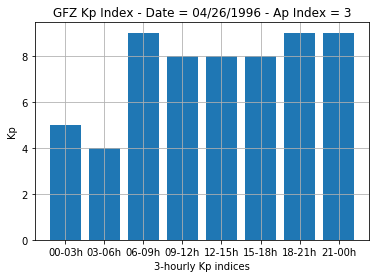

In [540]:
f = geoMagPlot(aDate,gfzSorted)

## Question 3

Let's go one step beyond what is shown here: https://www.spaceweatherlive.com/en/auroral-activity/top-50-geomagnetic-storms, and instead of showing the raw numbers for each date, write code to draw inline graphs instead. There are different ways to do this, and this might require using some more advanced plotting functionality. I haven't fully thought through how one might do it.

**Ric wrote:** I am using two approches. One more old-school looking and another that llook more modern. I think the old-school one is more readable.

In [583]:
print('=====================================')
print('Rank,Date,        Ap,  Kp Inline Plot')
print('=====================================')
for indx in range(len(SWgeoMagDF)):
    vals =[int(x[:1]) for x in SWgeoMagDF.iloc[indx,:].values[3:11]]
    rank = SWgeoMagDF.iloc[indx,:].values[0]
    dateSTR = SWgeoMagDF.iloc[indx,:].values[1].strftime("%m/%d/%Y")
    Ap = SWgeoMagDF.iloc[indx,:].values[2]
    print([rank]+[dateSTR]+[Ap]+sparklines(vals))
    print('=====================================')

Rank,Date,        Ap,  Kp Inline Plot
[1, '10/29/2003', 204, '▂▁█▇▇▇██']
[2, '10/30/2003', 191, '█▄▁▁▁▄██']
[3, '07/15/2000', 164, '▁▂▃▂▇███']
[4, '03/31/2001', 192, '▃██▁▃▆▆▃']
[5, '07/27/2004', 186, '▆▆▃▆█▆▁▁']
[6, '11/10/2004', 161, '▇▇█▇▅▄▂▁']
[7, '11/20/2003', 150, '▁▄▅▅▇██▇']
[8, '11/06/2001', 142, '██▄▁▁▄▃▃']
[9, '11/08/2004', 140, '██▇▆▃▁▂▃']
[10, '11/09/2004', 119, '▃▃▁▃▄▄█▄']
[11, '08/24/2005', 102, '▁▁▄█▆▆▄▂']
[12, '05/04/1998', 101, '▅█▇▅▅▃▁▂']
[13, '04/07/2000', 74, '█▄▄▁▁▁▁▁']
[14, '09/25/1998', 117, '███▇▆▆▂▁']
[15, '10/31/2003', 116, '██▆▆▆▃▁▁']
[16, '05/29/2003', 109, '▂▂▂▁▇███']
[17, '09/08/2017', 106, '█▃▁▃█▆▄▃']
[18, '11/24/2001', 104, '▁▄█▇█▇▁▄']
[19, '04/17/1994', 100, '▇██▇▄▁▁▁']
[20, '12/15/2006', 94, '██▆▄▄▁▁▁']
[21, '05/08/2005', 91, '▄▃▁▄██▃▁']
[22, '05/15/2005', 87, '▄▄██▁▁▃▃']
[23, '04/11/2001', 85, '▂▁▁▁▃███']
[24, '04/06/2000', 82, '▁▃▂▁▂▇██']
[25, '05/23/2002', 78, '▂▂▁▇██▄▂']
[26, '06/22/2015', 57, '▁▃▄▃▅▅█▅']
[27, '09/17/2000', 56, '▄▃▁▂▃▄▄█']
[28, '07

In [582]:
# From: https://github.com/aayoubi/spyklines/blob/master/spyklines/sparkline.py
class SparkLine(object):
    '''
    A SparkLine object that can be plotted on a Matplotlib Axe
    Requires:
        - name: the chart's label
        - values: the chart's list of data points
    '''
    def __init__(self, name, values):
        self.name = name
        self.values = values

    def plot(self, ax):
        ax.plot(self.values, linewidth=0.75)
        ax.set_ylabel(self.name, rotation=0, fontsize=8)
        ax.get_yaxis().set_label_coords(-0.1, 0.5)
        for k, v in ax.spines.items():
            v.set_edgecolor('#D3D3D3')
            if k != 'bottom':
                v.set_visible(False)
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

    def __str__(self):
        return "{} - {}".format(self.name, self.values)

In [585]:
# From: https://github.com/aayoubi/spyklines/blob/master/spyklines/sparkline.py
class TrendLine(object):
    def __init__(self, name, data):
        self.name = name
        self.values = data

    def plot(self, ax):
        z = np.polyfit(range(0, len(self.values)), self.values, 1)
        p = np.poly1d(z)
        for k, v in ax.spines.items():
            v.set_edgecolor('#D3D3D3')
            if k != 'bottom':
                v.set_visible(False)
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        ax.plot(range(0, len(self.values)), p(self.values), ':', linewidth=0.5)

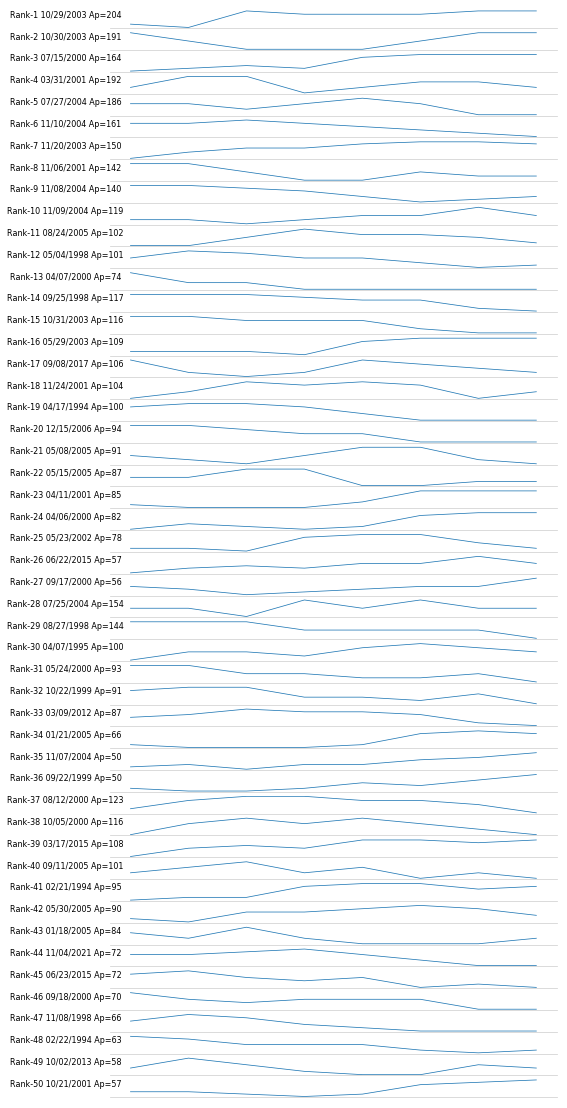

In [599]:
number_of_plots = 50
plt.figure(figsize=(8, 20))
for i in range(1, number_of_plots + 1):
    ax = plt.subplot(number_of_plots, 1, i)
    values = [int(x[:1]) for x in SWgeoMagDF.iloc[i-1,:].values[3:11]]
    #values = np.random.randint(100, 500, size=100)
    
    rank = SWgeoMagDF.iloc[i-1,:].values[0]
    dateSTR = SWgeoMagDF.iloc[i-1,:].values[1].strftime("%m/%d/%Y")
    Ap = SWgeoMagDF.iloc[i-1,:].values[2]
    
    sparkline = SparkLine('Rank-{}'.format(rank)+' {}'.format(dateSTR)+' Ap={}'.format(Ap), values)
    sparkline.plot(ax)
    #trendline = TrendLine('line-{}'.format(i), values)
    #trendline.plot(ax)
plt.show()

## Question 4

Write the code to draw a single plot where each of the dates is shown with as a line rather than as a bar chart, with all 50 dates on the same plot. Explore ways to make this plot understandable.

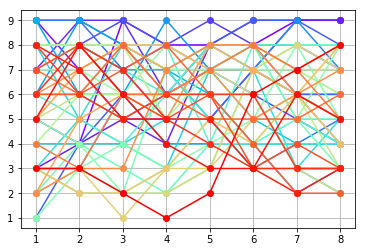

In [635]:
color = cm.rainbow(np.linspace(0, 1, len(SWgeoMagDF)))
for indx in range(len(SWgeoMagDF)):
    yVals = [int(x[:1]) for x in SWgeoMagDF.iloc[indx,:].values[3:11]]
    xVals = np.linspace(1,len(yVals),num=len(yVals),dtype=int)
    xlabels = [x for x in SWgeoMagDF.iloc[indx,:].index[3:11]]
    date = SWgeoMagDF.iloc[indx,1]
    dateSTR = date.strftime("%m/%d/%Y")
    rank = SWgeoMagDF.iloc[indx,0]
    Ap = SWgeoMagDF.iloc[indx,2]
    c = color[indx]
    plt.plot(xVals,
         yVals,
         linestyle='solid',marker='o',label='Pos{} - '.format(rank)+'{}'.format(dateSTR),color=c)
    ax.set_xticklabels([0]+xlabels)
    ax.set_title("3-hourly Kp indices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Kp")
#plt.legend()
plt.grid()
plt.show()

C:\Users\rzamb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


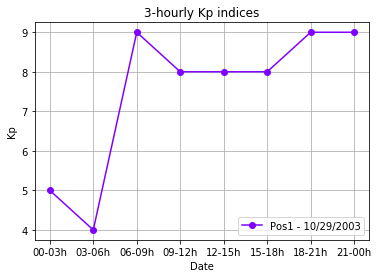

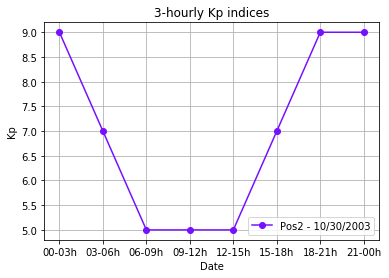

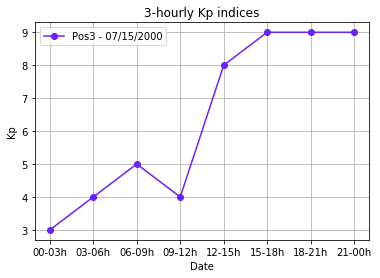

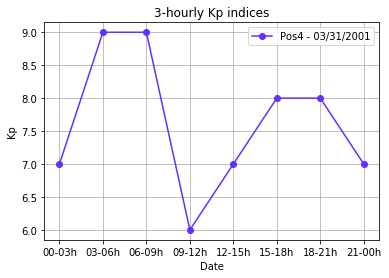

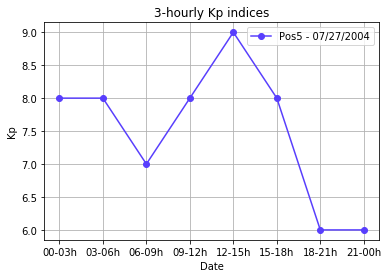

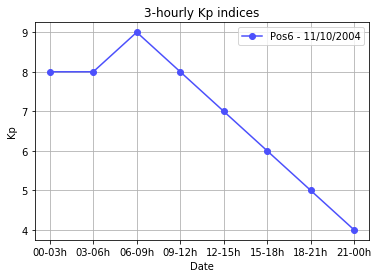

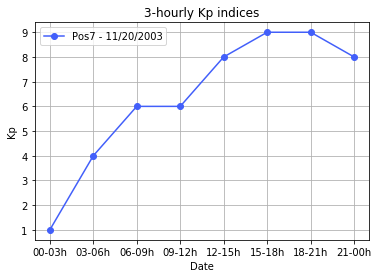

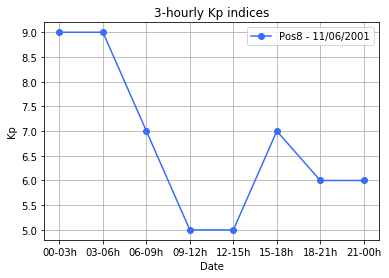

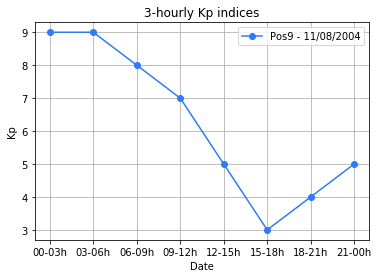

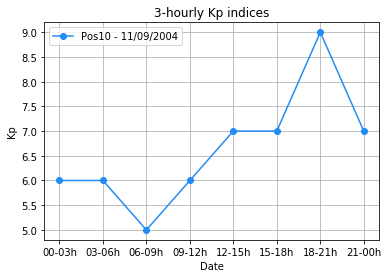

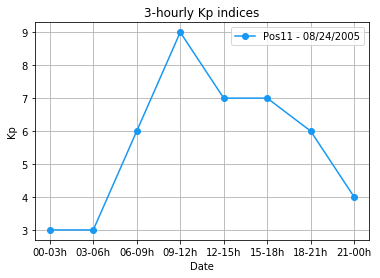

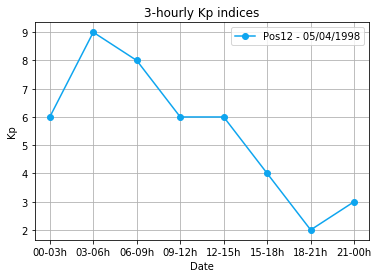

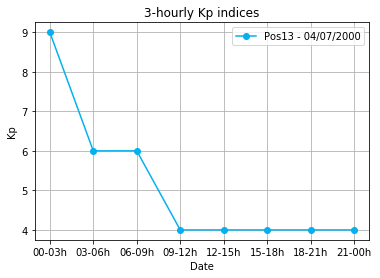

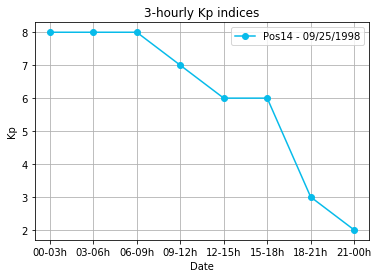

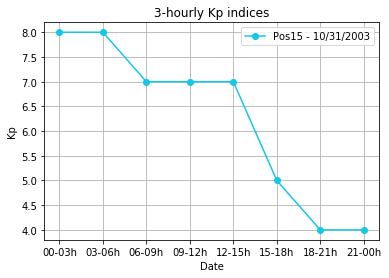

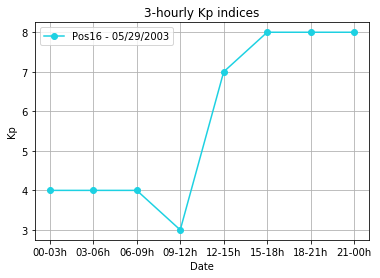

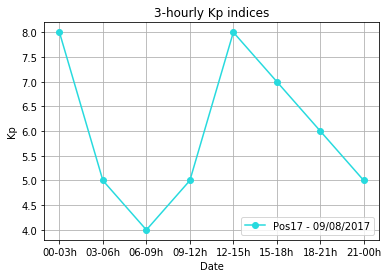

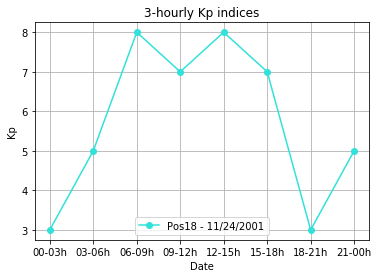

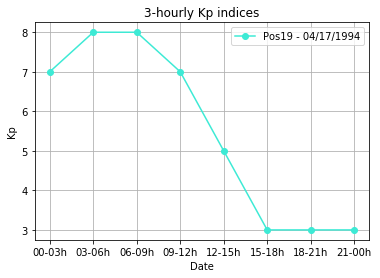

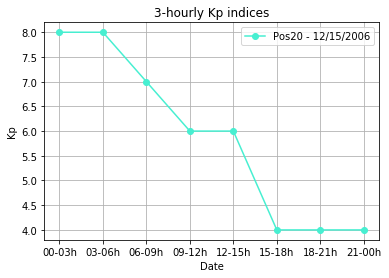

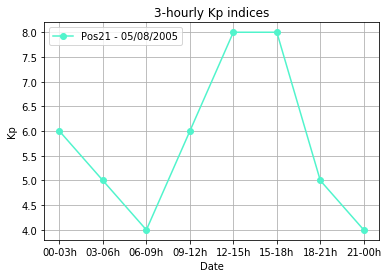

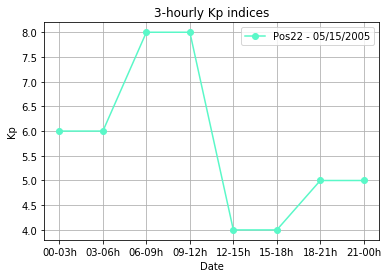

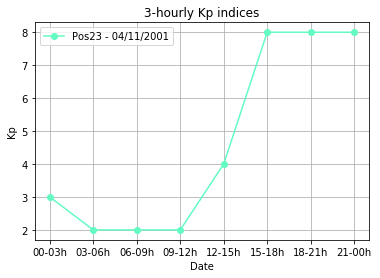

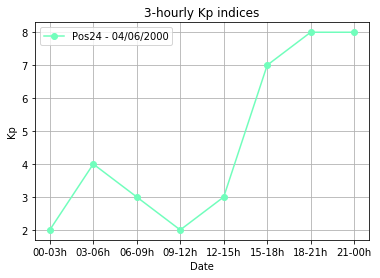

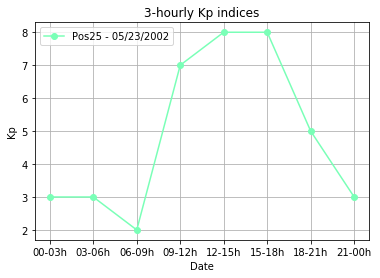

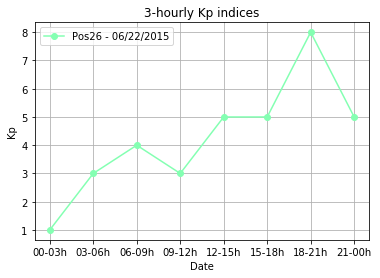

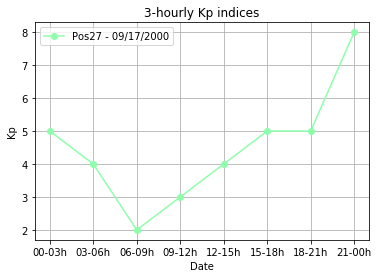

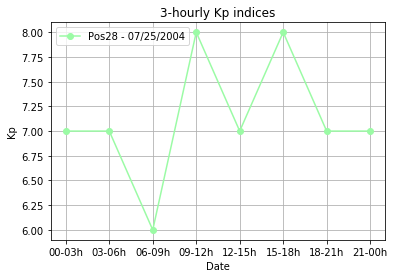

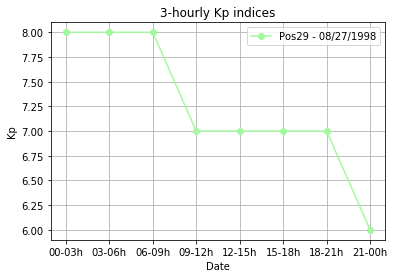

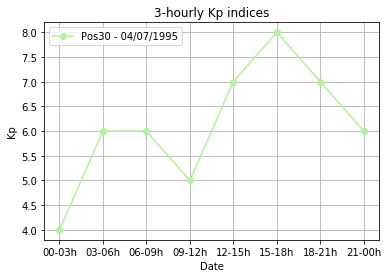

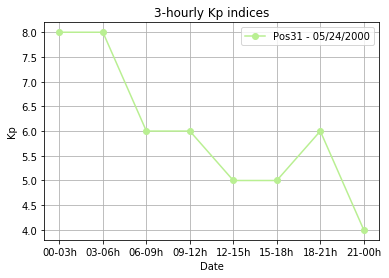

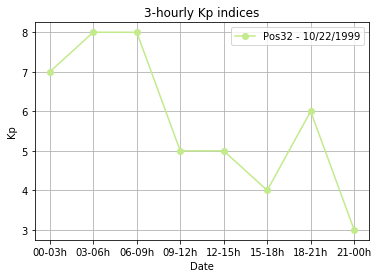

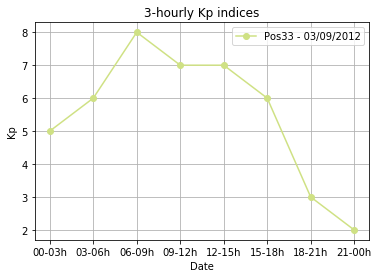

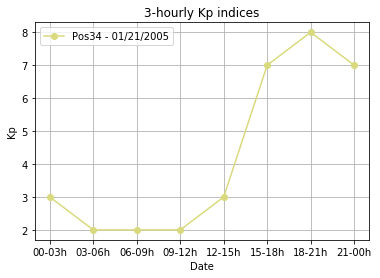

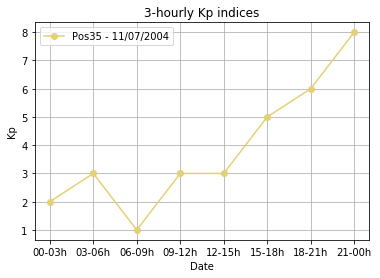

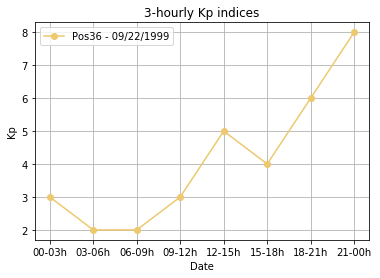

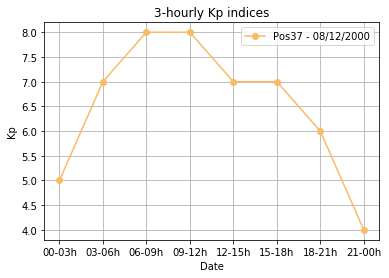

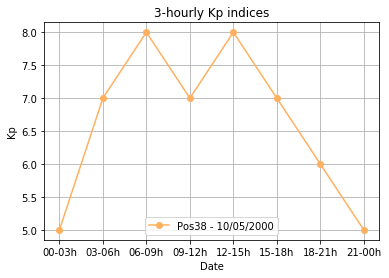

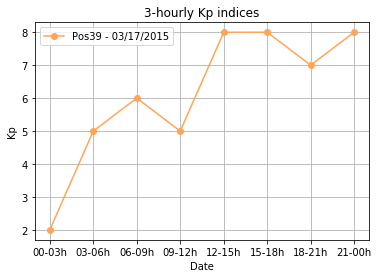

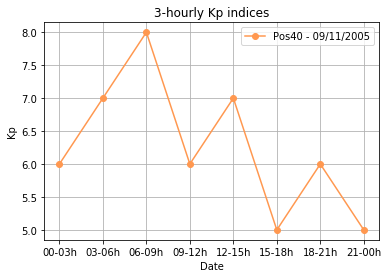

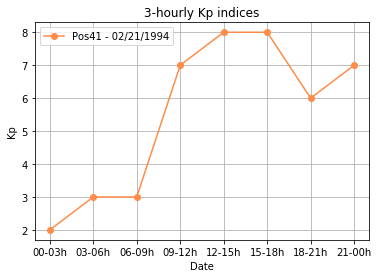

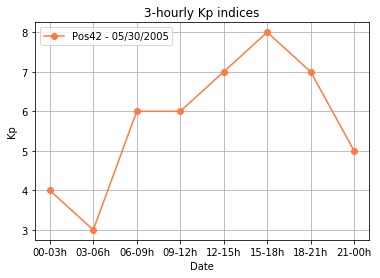

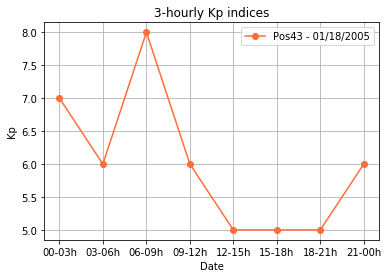

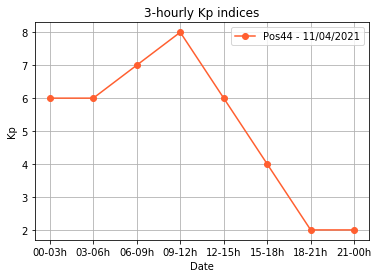

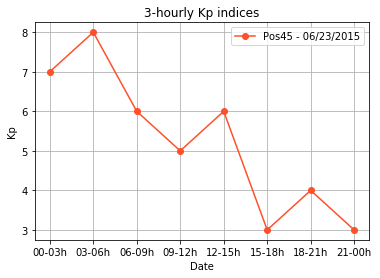

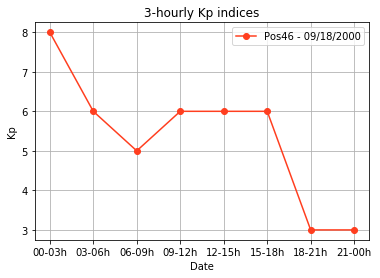

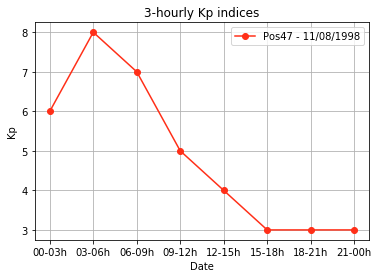

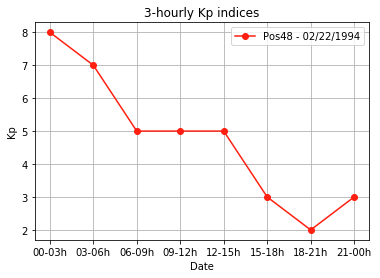

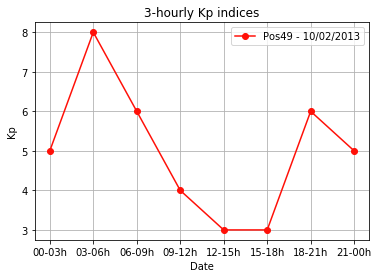

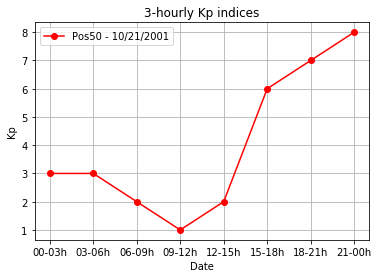

In [636]:
color = cm.rainbow(np.linspace(0, 1, len(SWgeoMagDF)))
for indx in range(len(SWgeoMagDF)):
    yVals = [int(x[:1]) for x in SWgeoMagDF.iloc[indx,:].values[3:11]]
    xVals = np.linspace(1,len(yVals),num=len(yVals),dtype=int)
    xlabels = [x for x in SWgeoMagDF.iloc[indx,:].index[3:11]]
    date = SWgeoMagDF.iloc[indx,1]
    dateSTR = date.strftime("%m/%d/%Y")
    rank = SWgeoMagDF.iloc[indx,0]
    Ap = SWgeoMagDF.iloc[indx,2]
    c = color[indx]
    fig, ax = plt.subplots()
    ax.plot(xVals,
         yVals,
         linestyle='solid',marker='o',label='Pos{} - '.format(rank)+'{}'.format(dateSTR),color=c)
    ax.set_xticklabels([0]+xlabels)
    ax.set_title("3-hourly Kp indices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Kp")
    plt.legend()
    plt.grid()
plt.show()

**Ric wrote:** I think the best approach is to select one date and print that one in color while plotting the rest in gray. Below there is an example:

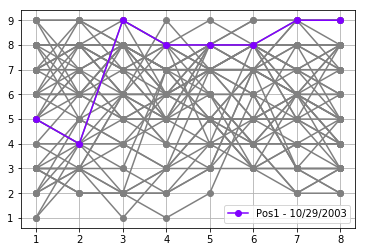

In [639]:
color = cm.rainbow(np.linspace(0, 1, len(SWgeoMagDF)))
for indx in range(len(SWgeoMagDF)):
    yVals = [int(x[:1]) for x in SWgeoMagDF.iloc[indx,:].values[3:11]]
    xVals = np.linspace(1,len(yVals),num=len(yVals),dtype=int)
    xlabels = [x for x in SWgeoMagDF.iloc[indx,:].index[3:11]]
    date = SWgeoMagDF.iloc[indx,1]
    dateSTR = date.strftime("%m/%d/%Y")
    rank = SWgeoMagDF.iloc[indx,0]
    Ap = SWgeoMagDF.iloc[indx,2]
    c = color[indx]
    plt.plot(xVals,
         yVals,
         linestyle='solid',marker='o',color='gray')
    ax.set_xticklabels([0]+xlabels)
    ax.set_title("3-hourly Kp indices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Kp")
yVals = [int(x[:1]) for x in SWgeoMagDF.iloc[0,:].values[3:11]]
xVals = np.linspace(1,len(yVals),num=len(yVals),dtype=int)
xlabels = [x for x in SWgeoMagDF.iloc[0,:].index[3:11]]
date = SWgeoMagDF.iloc[0,1]
dateSTR = date.strftime("%m/%d/%Y")
rank = SWgeoMagDF.iloc[0,0]
Ap = SWgeoMagDF.iloc[0,2]
c = color[0]
plt.plot(xVals,
    yVals,
    linestyle='solid',marker='o',label='Pos{} - '.format(rank)+'{}'.format(dateSTR),color=c)
ax.set_xticklabels([0]+xlabels)
ax.set_title("3-hourly Kp indices")
ax.set_xlabel("Date")
ax.set_ylabel("Kp")
plt.legend()
plt.grid()
plt.show()

In [640]:
SWgeoMagDF

,Rank,Date,Ap,00-03h,03-06h,06-09h,09-12h,12-15h,15-18h,18-21h,21-00h,Kp_max
0,1,2003-10-29 00:00:00,204,5-,4,9,8,8-,8-,9-,9-,9
1,2,2003-10-30 00:00:00,191,9-,7+,5+,5-,5,7,9,9,9
2,3,2000-07-15 00:00:00,164,3,4-,5-,4+,8,9-,9,9-,9
3,4,2001-03-31 00:00:00,192,7-,9-,9-,6+,7,8,8+,7+,9-
4,5,2004-07-27 00:00:00,186,8+,8-,7+,8,9-,8+,6+,6,9-
5,6,2004-11-10 00:00:00,161,8-,8+,9-,8+,7+,6+,5+,4+,9-
6,7,2003-11-20 00:00:00,150,1,4-,6+,6+,8-,9-,9-,8,9-
7,8,2001-11-06 00:00:00,142,9-,9-,7,5,5+,7-,6+,6+,9-
8,9,2004-11-08 00:00:00,140,9-,9-,8+,7,5,3-,4+,5+,9-
9,10,2004-11-09 00:00:00,119,6-,6,5,6,7,7-,9-,7,9-
